# Applied Math 586, Notebook 2

Illustration of implementing Forward Euler and exploring absolute stability for a nonlinear problem.

The next cell sets things up so that `NumPy` and `matplotlib` are imported and plots appear inline.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## General implementation of Forward Euler

In [2]:
def euler(f, t0, tfinal, eta, nsteps, verbose=True):
    un = zeros(nsteps+1)
    un[0] = eta
    dt = float(tfinal) / nsteps
    if verbose:
        print "dt = %10.6f" % dt
    tn = linspace(t0,tfinal,nsteps+1)
    for n in range(nsteps):
        un[n+1] = un[n] + dt*f(un[n],tn[n])
    return tn,un

## The problem from Homework 1 Problem 6:

$u'(t) = u^2(t) - \sin(t) - \cos^2(t)$.

In [3]:
f = lambda u,t:  u**2 - sin(t) - cos(t)**2
utrue = lambda t: cos(t)
t0 = 0;  tfinal = 30.;  eta = 1.

dt =   0.107143


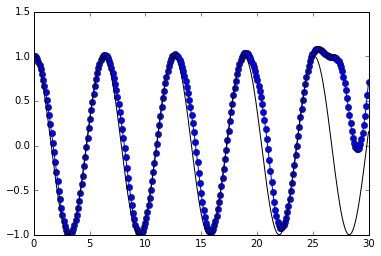

In [4]:
nsteps = 280
tn,un = euler(f, t0, tfinal, eta, nsteps)
plot(tn,un,'bo-')
plot(tn,utrue(tn),'k')

### Plots of error and amplification factor

Note that the error is growing in regions where $U^n >0$ and decaying where $U^n <0$, at least as long as $U^n$ does not get too far away from the true solution:

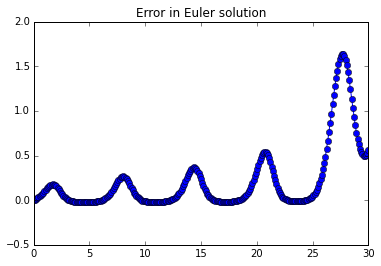

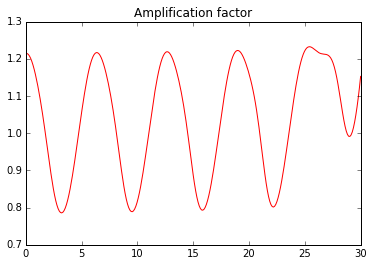

In [5]:
En = un - utrue(tn) 
En_max = abs(En).max()
En_normalized = 2 * En / En_max
plot(tn, En, 'o-')
title("Error in Euler solution")
figure()
dt = (tfinal - t0)/nsteps
plot(tn, 1. + 2*dt*un, 'r')
title("Amplification factor")

Also note that the true solution is very sensitive to initial conditions for this problem, so if we get too far from the true solution we start moving away and can't recover.  (And recall that $u'(t) = u^2(t)$ has a solution that blows up in finite time.)

Below we use the SciPy routine `odeint` to better approximate the true solution with other initial conditions $u(0)$:

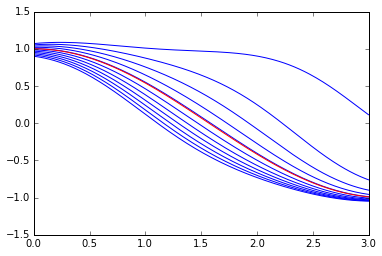

In [6]:
from scipy.integrate import odeint
t_out = linspace(0,3,200)
for u0 in linspace(0.9, 1.07, 11):
    u_out = odeint(f, u0, t_out)
    plot(t_out, u_out, 'b')
plot(t_out, cos(t_out), 'r')